### IMPORT LIBRARIES

In [1]:
import os
import sys

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### READ DATASET

In [50]:
mdata = pd.read_csv("data/data.csv")
mdata = mdata.set_index('date')
mdata

,tas_0,tas_1,tas_2,tas_3,tas_4,tas_5,tas_6,tas_7,tas_8,pr_0,pr_1,pr_2,pr_3,pr_4,pr_5,pr_6,pr_7,pr_8,flow
date,,,,,,,,,,,,,,,,,,,
1958-01-04,-12.800000,-13.000000,-13.000000,-12.500000,-12.500000,-12.700000,-12.000000,-12.500000,-12.9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.723781
1958-01-05,-7.800000,-7.900000,-8.400000,-7.000000,-7.300000,-8.600000,-6.500000,-7.700000,-8.3,2.0,2.2,3.0,3.300000,3.7,0.7,3.1,4.2,1.100000,0.960882
1958-01-06,-11.000000,-9.900000,-6.500000,-8.500000,-9.000000,-7.400000,-7.900000,-6.800000,-5.8,12.7,11.0,16.5,12.500000,11.2,12.2,14.1,14.2,10.500000,0.001000
1958-01-07,-13.200000,-12.200000,-7.900000,-10.700000,-11.300000,-9.800000,-10.100000,-8.500000,-7.4,6.6,6.9,9.6,7.300000,6.5,5.2,10.4,5.7,3.700000,0.001000
1958-01-08,-19.900000,-19.299999,-15.400000,-18.400000,-18.700001,-16.900000,-17.700001,-15.900000,-14.9,3.4,3.6,2.7,3.500000,3.8,3.3,2.9,4.0,3.500000,0.316796
1958-01-09,-19.900000,-20.000000,-18.600000,-19.600000,-19.700001,-19.500000,-19.200001,-19.100000,-17.0,1.9,2.0,1.4,1.800000,1.9,2.2,2.0,2.0,2.300000,1.095725
1958-01-10,-18.000000,-17.700001,-16.299999,-17.000000,-17.100000,-16.700001,-16.500000,-16.200001,-14.3,0.7,0.6,0.3,0.600000,0.7,0.7,0.6,0.8,0.900000,0.001000
1958-01-11,-15.800000,-15.400000,-12.800000,-14.800000,-14.900000,-13.000000,-14.300000,-12.400000,-11.5,1.4,1.2,3.3,2.200000,1.3,0.4,2.3,0.8,0.100000,0.743331
1958-01-12,-11.600000,-10.700000,-8.700000,-9.600000,-9.900000,-9.000000,-9.100000,-8.600000,-7.2,3.0,2.7,3.4,3.500000,3.3,3.3,3.6,4.2,3.300000,1.734174


### Function to plot Time Series, Auto Correlation & Partial Correlation

In [31]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        plt.tight_layout()
    return


### Iterate through combinations of ARIMA(p, d, q) models to best fit our time series.

In [34]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) # [0,1,2,3,4]
    d_rng = range(2) # [0,1]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    print(i, d, j)
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    print('success')
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

# Notice I've selected a specific time period to run this analysis
TS = mdata['tas_0'].as_matrix()

res_tup = _get_best_model(TS)
TS

(0, 0, 0)
(0, 0, 1)
success
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 1, 0)
(0, 1, 1)
success
(0, 1, 2)
success
(0, 1, 3)
success
(0, 1, 4)
success
(1, 0, 0)
success
(1, 0, 1)
success
(1, 0, 2)
success
(1, 0, 3)
success
(1, 0, 4)
success
(1, 1, 0)
success
(1, 1, 1)
success
(1, 1, 2)
success
(1, 1, 3)
success
(1, 1, 4)
success
(2, 0, 0)
success
(2, 0, 1)
success
(2, 0, 2)
success
(2, 0, 3)
success
(2, 0, 4)
success
(2, 1, 0)
success
(2, 1, 1)
success
(2, 1, 2)
success
(2, 1, 3)
success
(2, 1, 4)
success
(3, 0, 0)
success
(3, 0, 1)
success
(3, 0, 2)
success
(3, 0, 3)
success
(3, 0, 4)
success
(3, 1, 0)
success
(3, 1, 1)
success
(3, 1, 2)
success
(3, 1, 3)
success
(3, 1, 4)


/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


success
(4, 0, 0)
success
(4, 0, 1)
success
(4, 0, 2)
success
(4, 0, 3)
success
(4, 0, 4)


/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


success
(4, 1, 0)
success
(4, 1, 1)
success
(4, 1, 2)
success
(4, 1, 3)


/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


success
(4, 1, 4)
aic: 96036.73858 | order: (4, 1, 3)


array([-12.80000019,  -7.80000019, -11.        , ..., -11.89999962,
        -7.        ,  -2.4000001 ])

### Save the model and order

In [35]:
order = res_tup[1]
model = res_tup[2]

#### We perform the Ljung-Box test and find the p-value is significantly larger than 0.05 and as such we can state that there is strong evidence for discrete white noise being a good fit to the residuals.

In [36]:
sms.diagnostic.acorr_ljungbox(model.resid, lags=[20], boxpierce=False)

(array([17.76633597]), array([0.60279761]))

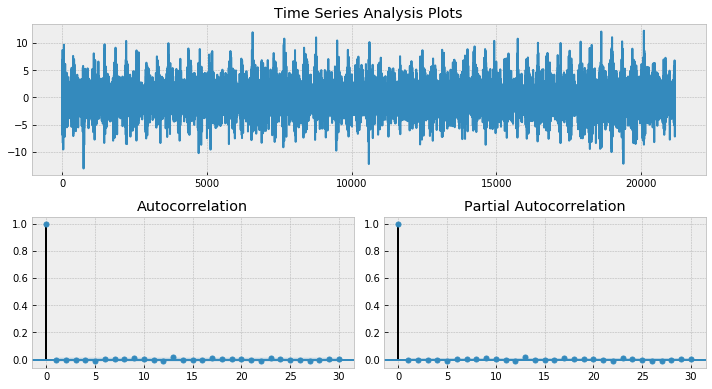

In [37]:
tsplot(model.resid, lags=30)

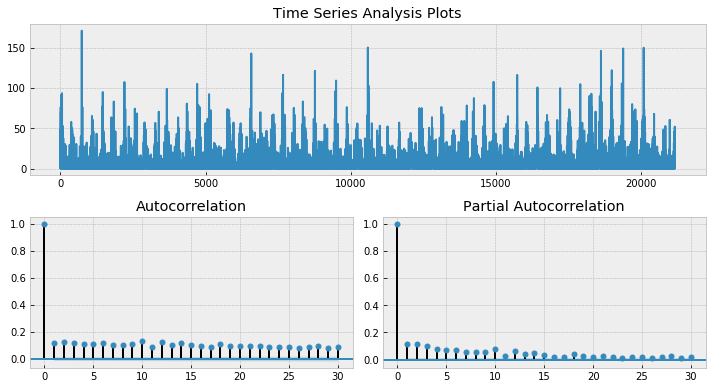

In [38]:
tsplot(model.resid**2, lags=30)

#### Pick the GARCH model orders according to the ARIMA model with lowest AIC.
#### Fit the GARCH(p, q) model to our time series.
#### Examine the model residuals and squared residuals for autocorrelation

In [39]:
# Now we can fit the arch model using the best fit arima model parameters
from arch import arch_model
p_ = order[0]
o_ = order[1]
q_ = order[2]

# Using student T distribution usually provides better fit
am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())


                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -46554.0
Distribution:      Standardized Student's t   AIC:                           93129.9
Method:                  Maximum Likelihood   BIC:                           93217.5
                                              No. Observations:                21177
Date:                      Thu, Mar 15 2018   Df Residuals:                    21166
Time:                              12:17:16   Df Model:                           11
                                  Mean Model                                  
                 coef    std err          t      P>|t|        95.0% Conf. Int.
-----------------------------------------------------------------------------

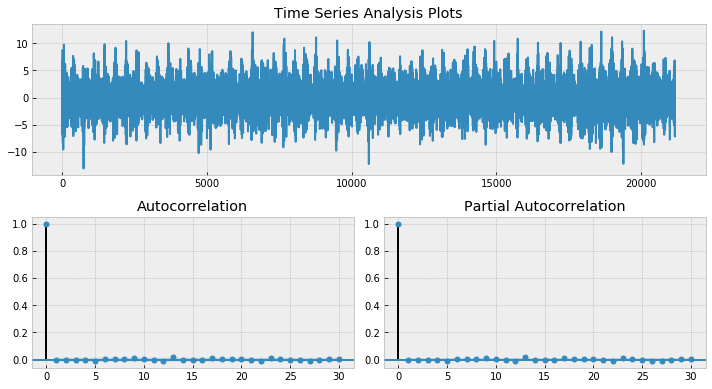

In [40]:
tsplot(res.resid, lags=30)

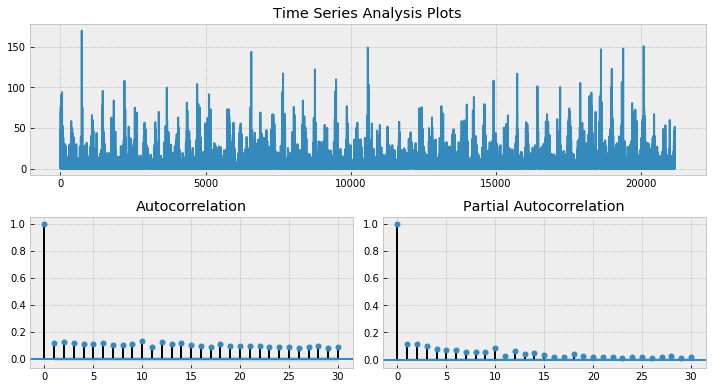

In [41]:
tsplot(res.resid**2, lags=30)

#### Forecast for next 10 Days

In [42]:
out = res.forecast(horizon=10, start=None, align='origin')
# print(out.mean.iloc[-1])
print(out.variance.iloc[-1])

h.01    8.929610
h.02    8.827361
h.03    8.791355
h.04    8.759389
h.05    8.718598
h.06    8.679184
h.07    8.641368
h.08    8.603780
h.09    8.566577
h.10    8.529907
Name: 21176, dtype: float64


/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fine


/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likel

Fine


/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fine


/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fine


/home/innovationchef/.local/lib/python2.7/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


LinAlgError: SVD did not converge

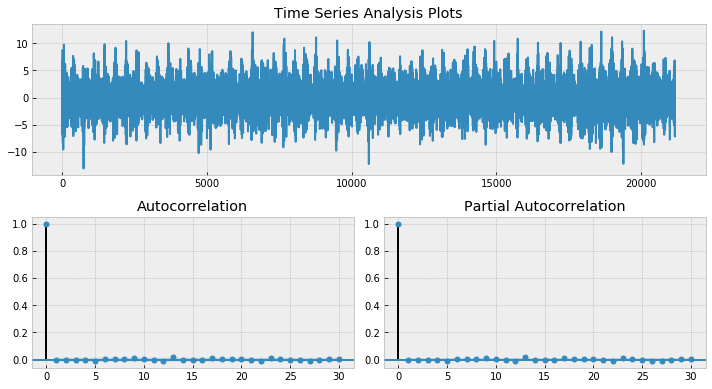

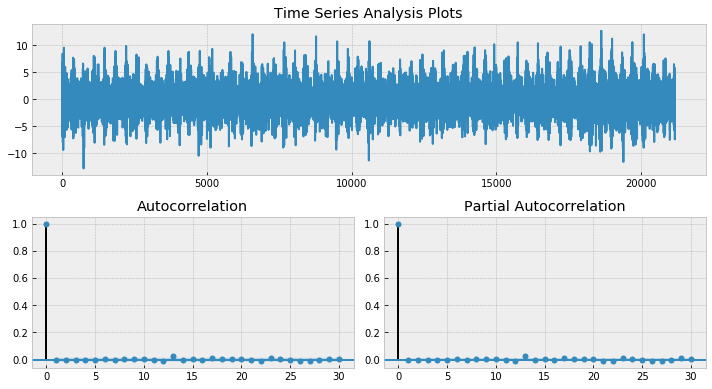

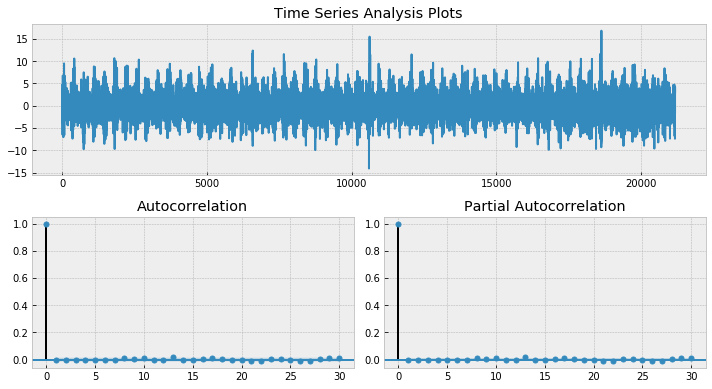

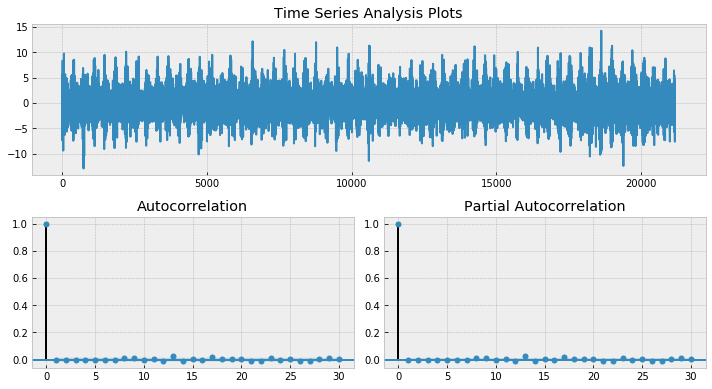

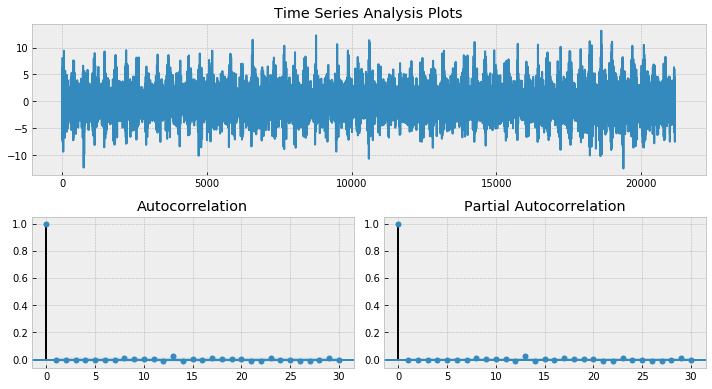

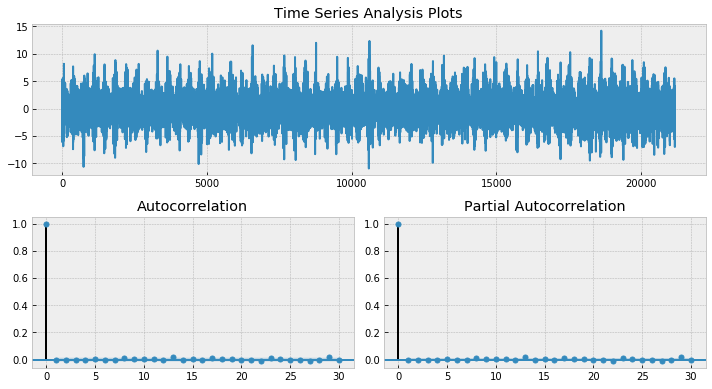

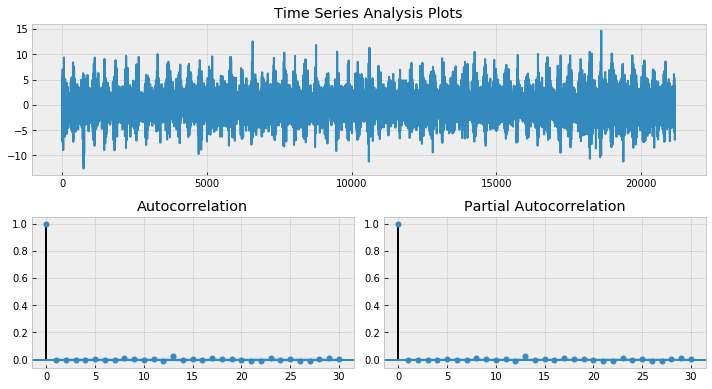

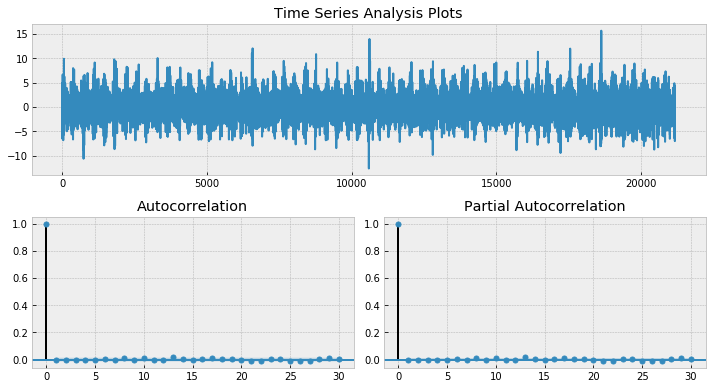

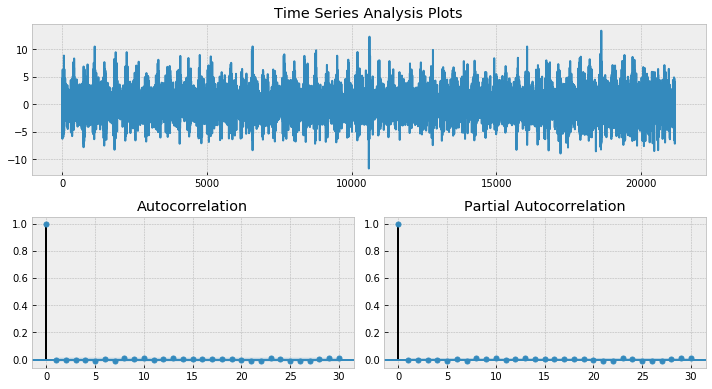

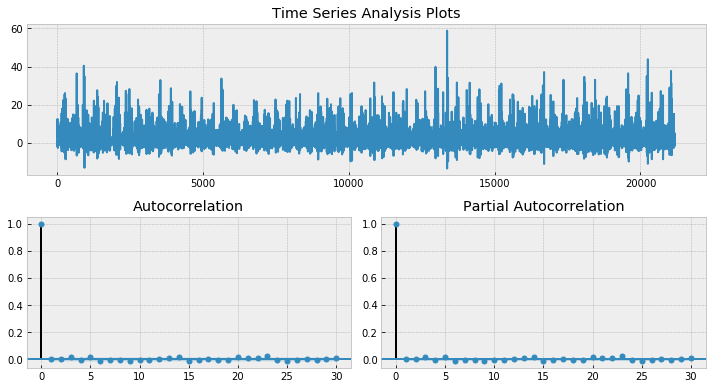

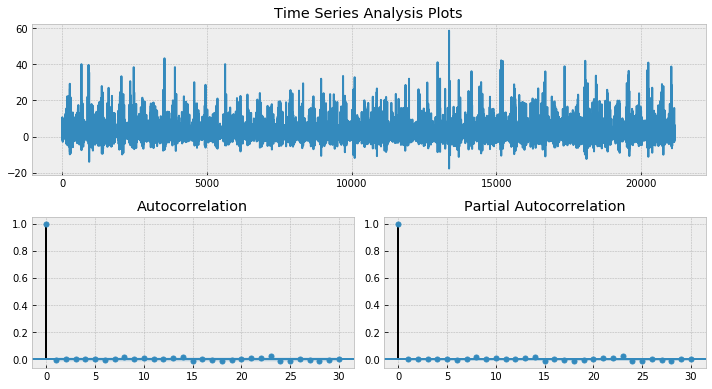

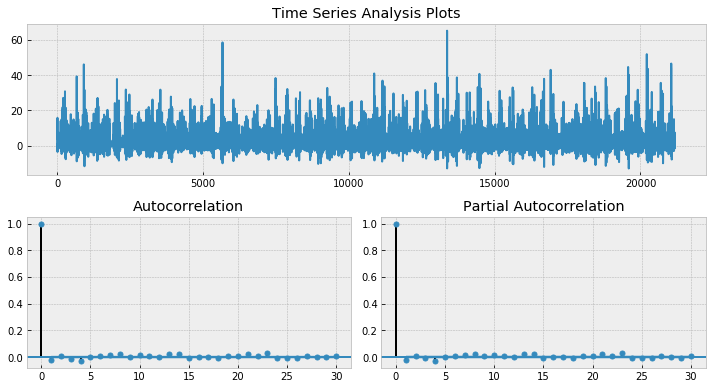

In [57]:
out = {}
for column in mdata.columns:
    data = mdata[column].as_matrix()
    model = smt.ARIMA(data, order=(4,1,3)).fit( method='mle', trend='nc' )
    _,p = sms.diagnostic.acorr_ljungbox(model.resid, lags=[20], boxpierce=False)
    if p[0]>0.5: print "Fine"
    archmodel = arch_model(model.resid, p=4, o=1, q=3, dist='StudentsT')
    res = archmodel.fit(update_freq=5, disp='off')
    tsplot(res.resid, lags=30)
    out[column] = res.forecast(horizon=10, start=None, align='origin')

In [60]:
for k, v in out.items():
    print v.variance.iloc[-1]

h.01    9.111765
h.02    8.931406
h.03    8.899835
h.04    8.868581
h.05    8.807036
h.06    8.752903
h.07    8.704565
h.08    8.654432
h.09    8.604446
h.10    8.555776
Name: 21176, dtype: float64
h.01    8.950811
h.02    8.782577
h.03    8.785118
h.04    8.759943
h.05    8.708661
h.06    8.668808
h.07    8.632263
h.08    8.593543
h.09    8.555329
h.10    8.518100
Name: 21176, dtype: float64
h.01    8.109944
h.02    7.987726
h.03    7.977464
h.04    7.950053
h.05    7.905877
h.06    7.868702
h.07    7.833998
h.08    7.798213
h.09    7.762841
h.10    7.728247
Name: 21176, dtype: float64
h.01    7.993136
h.02    7.900490
h.03    7.896532
h.04    7.878886
h.05    7.849137
h.06    7.824198
h.07    7.800837
h.08    7.776775
h.09    7.752950
h.10    7.729575
Name: 21176, dtype: float64
h.01    8.608026
h.02    8.506735
h.03    8.454191
h.04    8.424397
h.05    8.384001
h.06    8.342406
h.07    8.303353
h.08    8.264757
h.09    8.226353
h.10    8.188503
Name: 21176, dtype: float64
h.01    8.